# Student Performance Indicator: Exploratory Data Analysis

### About the Dataset
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

**Source:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Description
- **gender:** Sex of students
- **race/ethnicity:** Indicates the ethnicity of students
- **parental level of education:** Parents' final education 
- **lunch:** Type of lunch the student had before test
- **test preparation course:** Tells whether the course was completed before the test or not
- **math score:** Math's score of the student
- **reading score:** Reading's score of the student
- **writing score:** Writing's score of the student

### Objective
Our objective is to predict a student's score on the test they underwent.

## 1. Importing libraries

In [89]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='rocket')

# Stats
import scipy.stats as stats

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# Configuring some settings
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## 2. Getting the dataset

In [6]:
# Creating a dataframe
df = pd.read_csv('./data/StudentsPerformance.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
315,male,group C,high school,standard,none,71,66,65
592,male,group E,bachelor's degree,standard,none,68,68,64
121,male,group B,associate's degree,standard,completed,91,89,92
673,female,group C,associate's degree,standard,completed,65,84,84
406,male,group B,associate's degree,standard,completed,65,65,63


## 3. Exploratory Data Analysis

### 3.1 Basic information

In [7]:
# Getting the shape of the dataset
df.shape

(1000, 8)

In [10]:
# Getting information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Finding total nos. of duplicated rows
df.duplicated().sum()

0

In [11]:
# Describing the numerical features data mathematically
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Text(0.5, 1.0, 'Correlation between numerical features in the dataset')

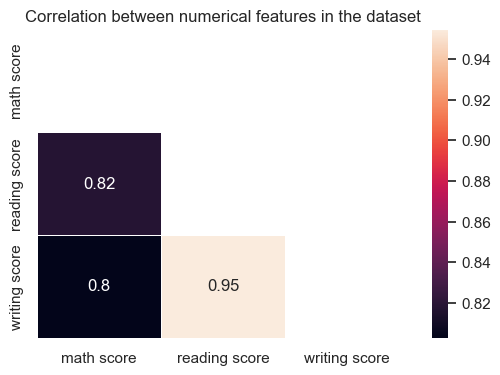

In [91]:
# Correlation between different numerical features
plt.figure(figsize=(6,4))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, linewidths=.5, mask=mask).set(facecolor = 'white')
plt.title("Correlation between numerical features in the dataset")

### 3.2 Target features

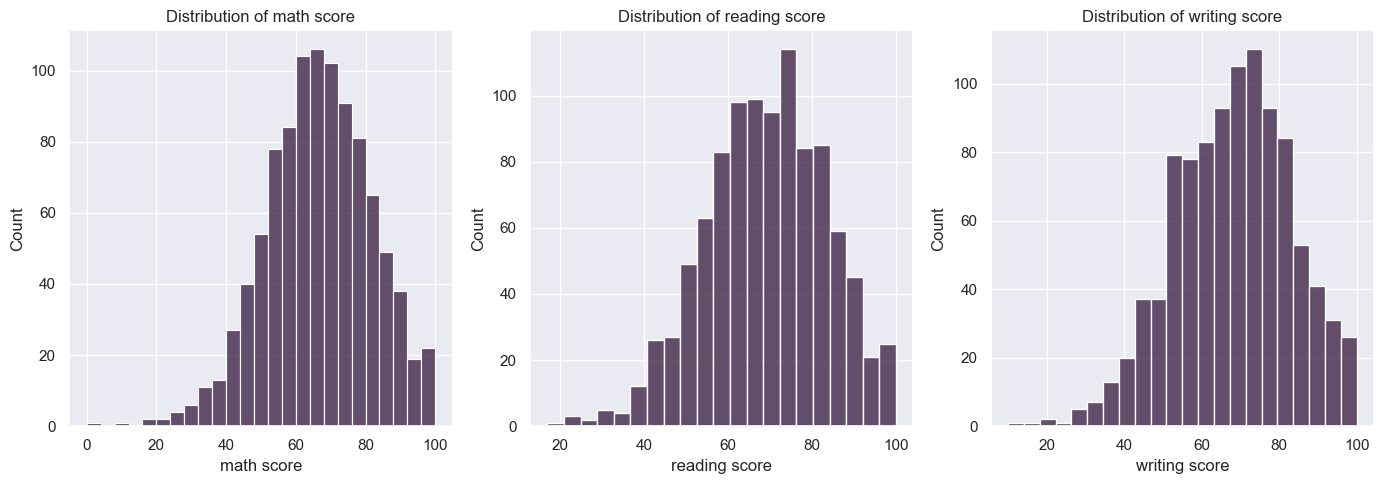

In [92]:
# Extracting all the target features
target_features = ['math score', 'reading score', 'writing score']

# Plotting distribution of target features
plt.figure(figsize=(14,5))
for count, feature in enumerate(target_features):
    ax = plt.subplot(1, 3, count+1)
    sns.histplot(data=df, x=feature, ax=ax)
    ax.set_title(f"Distribution of {feature}")
plt.tight_layout()